<a href="https://colab.research.google.com/github/frasertajima/kindle_clippings/blob/main/Kindle_my_clippings_reader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook ingests the `My Clippings.txt` file from the Kindle (located in the '/Documents' folder on your Kindle). You need to manually copy the file from your Kindle by connecting it to your PC and then uploading it to the Colab directory.  The result is a more useful database with:

+ `source` (the book, pdf or other source)

+ `highlight` (the actual text clipped on the Kindle)

+ `details` (the details of the highlight: page, location, date of clipping)

columns that can be easily explored. You can, for example, display all quotes from a `source` or search `highlights` for particular search terms, including using 'A or B' or 'A and B' search logic. Very basic machine learning is used to summarise topics found in the clippings.

The second part of the notebook automatically generates vocabulary words from single word highlights (when you highlight only one word in your Kindle). This permits an automatic collection of new vocabulary words (and, optionally, combination with an existing list of vocabulary words). A separate notebook, `oxford dictionary lookup.ipynb` automatically looks up the definition of words using the Oxford dictionary API (which you will need to register for and obtain). While the API is free, there are limits to the number of words that can be looked up.

You will need the following files in the base directory:
- `My Clippings.txt`
- current vocabulary words in a csv file (you can import old vocabulary words here using a spreadsheet for example)
- `blank.csv` if a vocabulary file is not available

The vocabulary portion will save the new vocabulary words to `Kindle_vocab.csv`. It will then load up previously saved vocabulary words found in `Kindle_vocab_updated.csv`. If this Jupyter notebook has not been run before, the `Kindle_vocab_updated.csv` file will not exist and the notebook will look for a base vocabulary file (`2DoList.csv`) failing which it will load up a blank.csv file. If you wish to add your existing vocabulary words with definitions, save them to a csv file format using a spreadsheet and save them as `2DoList.csv` (or modify the base vocabulary file name accordingly in the notebook).

This notebook has been tested to run in Colab. If you want to run it locally, you will need to install any dependencies not in your environment.

In [27]:
import pandas as pd
import numpy as np
pd.options.display.max_colwidth = 30000
pd.set_option('display.max_rows', 40)
colspecs = [(None, None)]
kindle_clipping_file="My Clippings.txt"
data = pd.read_fwf(kindle_clipping_file, colspecs=colspecs, header=None)
display(data.head(n=10))

,0
0,"William Shakespeare Complete Works Second Edition (Shakespeare, William)"
1,"- Your Highlight on page 105 | Location 11366-11367 | Added on Sunday, December 4, 2022 1:02:49 AM"
2,Pauca verba
3,==========
4,The Economist (calibre)
5,"- Your Highlight on page 36 | Location 538-545 | Added on Sunday, December 4, 2022 7:31:10 AM"
6,"The cost of all this is staggering. The 35 largest firms producing covid-19 tests raked in some 150bn yuan ($21bn) in revenues in the first half of 2022 alone. A broker, Soochow Securities, has estimated China’s bill for covid testing at 1.7trn yuan this year, or around 1.5% of GDP. That number, which some consider an underestimate, equates to nearly half of all China’s public spending on education in 2020. Worse, lockdowns and restrictions on movement have stunted consumer confidence and growth. During the week of November 14th, as covid cases rose, the number of domestic flights fell by 45% year on year. The three biggest airlines lost a combined 74bn yuan in the first nine months of 2022. Subway traffic in the ten largest cities was down by 32% year on year, according to Macquarie, an Australian bank. A measure of road freight in the week to November 25th was 33% below its level the year before. Box-office revenues, a gauge of people’s willingness to go out and about, tumbled by 64%. Only 37% of cinemas were open on November 28th."
7,==========
8,The Economist (calibre)
9,"- Your Highlight on page 38 | Location 572-574 | Added on Sunday, December 4, 2022 7:37:40 AM"


In [29]:
number_data = data.shape[0]
number_data

6164

In [30]:
# extract source, highlight_detail and quote from dataframe
source=data.iloc[::4, :]
highlight_detail=data.iloc[1::4, :]
quote=data.iloc[2::4, :]

In [31]:
source

,0
0,"William Shakespeare Complete Works Second Edition (Shakespeare, William)"
4,The Economist (calibre)
8,The Economist (calibre)
12,The Economist (calibre)
16,The Economist (calibre)
...,...
6144,The Odyssey (Homer)
6148,Ulysses (James Joyce)
6152,Jeeves Stories (P. G. Wodehouse)
6156,Jeeves Stories (P. G. Wodehouse)


In [32]:
highlight_detail

,0
1,"- Your Highlight on page 105 | Location 11366-11367 | Added on Sunday, December 4, 2022 1:02:49 AM"
5,"- Your Highlight on page 36 | Location 538-545 | Added on Sunday, December 4, 2022 7:31:10 AM"
9,"- Your Highlight on page 38 | Location 572-574 | Added on Sunday, December 4, 2022 7:37:40 AM"
13,"- Your Highlight on page 38 | Location 581-582 | Added on Sunday, December 4, 2022 7:45:15 AM"
17,"- Your Highlight on page 39 | Location 585-586 | Added on Sunday, December 4, 2022 7:45:46 AM"
...,...
6145,"- Your Highlight on page 102 | Location 1558-1561 | Added on Thursday, March 9, 2023 12:03:30 PM"
6149,"- Your Highlight on page 3 | Location 43-43 | Added on Thursday, March 9, 2023 2:00:37 PM"
6153,"- Your Highlight on page 7 | Location 97-97 | Added on Thursday, March 9, 2023 2:11:27 PM"
6157,"- Your Highlight on page 7 | Location 100-101 | Added on Thursday, March 9, 2023 2:14:11 PM"


In [33]:
quote

,0
2,Pauca verba
6,"The cost of all this is staggering. The 35 largest firms producing covid-19 tests raked in some 150bn yuan ($21bn) in revenues in the first half of 2022 alone. A broker, Soochow Securities, has estimated China’s bill for covid testing at 1.7trn yuan this year, or around 1.5% of GDP. That number, which some consider an underestimate, equates to nearly half of all China’s public spending on education in 2020. Worse, lockdowns and restrictions on movement have stunted consumer confidence and growth. During the week of November 14th, as covid cases rose, the number of domestic flights fell by 45% year on year. The three biggest airlines lost a combined 74bn yuan in the first nine months of 2022. Subway traffic in the ten largest cities was down by 32% year on year, according to Macquarie, an Australian bank. A measure of road freight in the week to November 25th was 33% below its level the year before. Box-office revenues, a gauge of people’s willingness to go out and about, tumbled by 64%. Only 37% of cinemas were open on November 28th."
10,"Any resort to harsher lockdowns will see sentiment turn sharply against China, Mr Wuttke suggests. “To lock this virus down, you have to try North Korean methods, and nobody does business with North Korea.”"
14,China largely halted nationwide vaccination campaigns in early 2022 and put its faith in grit.
18,"The stifling of debate has had baleful consequences. China has not approved the use of foreign vaccines, including the most effective ones,"
...,...
6146,"“Ah how shameless —the way these mortals blame the gods. From us alone, they say, come all their miseries, yes, but they themselves, with their own reckless ways, 40 compound their pains beyond their proper share."
6150,untonsured
6154,I was feeling like a badly wrapped brown-paper parcel.
6158,"If I ever breakfasted at half past eight I should walk on the Embankment, trying to end it all in a watery grave."


In [34]:
# test: for a specific quote, print source, highlight detail and quote
# repeat until last
"""
quote_number=0
while quote_number < quote.shape[0]:
      print(source.iloc[quote_number].to_string(header=None, index=False) + '\n',   
      highlight_detail.iloc[quote_number].to_string(header=None, index=False) + '\n',
      quote.iloc[quote_number].to_string(header=None, index=False) + '\n')

      quote_number += 1
"""

"\nquote_number=0\nwhile quote_number < quote.shape[0]:\n      print(source.iloc[quote_number].to_string(header=None, index=False) + '\n',   \n      highlight_detail.iloc[quote_number].to_string(header=None, index=False) + '\n',\n      quote.iloc[quote_number].to_string(header=None, index=False) + '\n')\n\n      quote_number += 1\n"

In [35]:
# make sure all three columns have the same index values to join correctly
# https://stackoverflow.com/questions/32249960/in-python-pandas-start-row-index-from-1-instead-of-zero-without-creating-additi#:~:text=RangeIndex%20is%20supported%20in%20pandas.%20%23df.index%20default%20value,like%20this%3A%20df.index%20%3D%20pd.RangeIndex%20%28start%3D1%2C%20stop%3D600%2C%20step%3D1%29
source.index = np.arange(0, len(source) + 0)
#print(source.index)

quote.index = np.arange(0, len(quote) + 0)
#print(quote.index)

highlight_detail.index = np.arange(0, len(highlight_detail) + 0)
#print(highlight_detail.index)


In [36]:
# combine dataframes into a more useful dataframe
df = pd.concat([source, quote, highlight_detail], axis="columns", ignore_index=True)
display(df)


,0,1,2
0,"William Shakespeare Complete Works Second Edition (Shakespeare, William)",Pauca verba,"- Your Highlight on page 105 | Location 11366-11367 | Added on Sunday, December 4, 2022 1:02:49 AM"
1,The Economist (calibre),"The cost of all this is staggering. The 35 largest firms producing covid-19 tests raked in some 150bn yuan ($21bn) in revenues in the first half of 2022 alone. A broker, Soochow Securities, has estimated China’s bill for covid testing at 1.7trn yuan this year, or around 1.5% of GDP. That number, which some consider an underestimate, equates to nearly half of all China’s public spending on education in 2020. Worse, lockdowns and restrictions on movement have stunted consumer confidence and growth. During the week of November 14th, as covid cases rose, the number of domestic flights fell by 45% year on year. The three biggest airlines lost a combined 74bn yuan in the first nine months of 2022. Subway traffic in the ten largest cities was down by 32% year on year, according to Macquarie, an Australian bank. A measure of road freight in the week to November 25th was 33% below its level the year before. Box-office revenues, a gauge of people’s willingness to go out and about, tumbled by 64%. Only 37% of cinemas were open on November 28th.","- Your Highlight on page 36 | Location 538-545 | Added on Sunday, December 4, 2022 7:31:10 AM"
2,The Economist (calibre),"Any resort to harsher lockdowns will see sentiment turn sharply against China, Mr Wuttke suggests. “To lock this virus down, you have to try North Korean methods, and nobody does business with North Korea.”","- Your Highlight on page 38 | Location 572-574 | Added on Sunday, December 4, 2022 7:37:40 AM"
3,The Economist (calibre),China largely halted nationwide vaccination campaigns in early 2022 and put its faith in grit.,"- Your Highlight on page 38 | Location 581-582 | Added on Sunday, December 4, 2022 7:45:15 AM"
4,The Economist (calibre),"The stifling of debate has had baleful consequences. China has not approved the use of foreign vaccines, including the most effective ones,","- Your Highlight on page 39 | Location 585-586 | Added on Sunday, December 4, 2022 7:45:46 AM"
...,...,...,...
1536,The Odyssey (Homer),"“Ah how shameless —the way these mortals blame the gods. From us alone, they say, come all their miseries, yes, but they themselves, with their own reckless ways, 40 compound their pains beyond their proper share.","- Your Highlight on page 102 | Location 1558-1561 | Added on Thursday, March 9, 2023 12:03:30 PM"
1537,Ulysses (James Joyce),untonsured,"- Your Highlight on page 3 | Location 43-43 | Added on Thursday, March 9, 2023 2:00:37 PM"
1538,Jeeves Stories (P. G. Wodehouse),I was feeling like a badly wrapped brown-paper parcel.,"- Your Highlight on page 7 | Location 97-97 | Added on Thursday, March 9, 2023 2:11:27 PM"
1539,Jeeves Stories (P. G. Wodehouse),"If I ever breakfasted at half past eight I should walk on the Embankment, trying to end it all in a watery grave.","- Your Highlight on page 7 | Location 100-101 | Added on Thursday, March 9, 2023 2:14:11 PM"


In [37]:
# output all the sources used in Kindle clippings
df[0].unique()


In [38]:
# provide meaningful column names
df.columns = ['source', 'highlight', 'detail']
df

,source,highlight,detail
0,"William Shakespeare Complete Works Second Edition (Shakespeare, William)",Pauca verba,"- Your Highlight on page 105 | Location 11366-11367 | Added on Sunday, December 4, 2022 1:02:49 AM"
1,The Economist (calibre),"The cost of all this is staggering. The 35 largest firms producing covid-19 tests raked in some 150bn yuan ($21bn) in revenues in the first half of 2022 alone. A broker, Soochow Securities, has estimated China’s bill for covid testing at 1.7trn yuan this year, or around 1.5% of GDP. That number, which some consider an underestimate, equates to nearly half of all China’s public spending on education in 2020. Worse, lockdowns and restrictions on movement have stunted consumer confidence and growth. During the week of November 14th, as covid cases rose, the number of domestic flights fell by 45% year on year. The three biggest airlines lost a combined 74bn yuan in the first nine months of 2022. Subway traffic in the ten largest cities was down by 32% year on year, according to Macquarie, an Australian bank. A measure of road freight in the week to November 25th was 33% below its level the year before. Box-office revenues, a gauge of people’s willingness to go out and about, tumbled by 64%. Only 37% of cinemas were open on November 28th.","- Your Highlight on page 36 | Location 538-545 | Added on Sunday, December 4, 2022 7:31:10 AM"
2,The Economist (calibre),"Any resort to harsher lockdowns will see sentiment turn sharply against China, Mr Wuttke suggests. “To lock this virus down, you have to try North Korean methods, and nobody does business with North Korea.”","- Your Highlight on page 38 | Location 572-574 | Added on Sunday, December 4, 2022 7:37:40 AM"
3,The Economist (calibre),China largely halted nationwide vaccination campaigns in early 2022 and put its faith in grit.,"- Your Highlight on page 38 | Location 581-582 | Added on Sunday, December 4, 2022 7:45:15 AM"
4,The Economist (calibre),"The stifling of debate has had baleful consequences. China has not approved the use of foreign vaccines, including the most effective ones,","- Your Highlight on page 39 | Location 585-586 | Added on Sunday, December 4, 2022 7:45:46 AM"
...,...,...,...
1536,The Odyssey (Homer),"“Ah how shameless —the way these mortals blame the gods. From us alone, they say, come all their miseries, yes, but they themselves, with their own reckless ways, 40 compound their pains beyond their proper share.","- Your Highlight on page 102 | Location 1558-1561 | Added on Thursday, March 9, 2023 12:03:30 PM"
1537,Ulysses (James Joyce),untonsured,"- Your Highlight on page 3 | Location 43-43 | Added on Thursday, March 9, 2023 2:00:37 PM"
1538,Jeeves Stories (P. G. Wodehouse),I was feeling like a badly wrapped brown-paper parcel.,"- Your Highlight on page 7 | Location 97-97 | Added on Thursday, March 9, 2023 2:11:27 PM"
1539,Jeeves Stories (P. G. Wodehouse),"If I ever breakfasted at half past eight I should walk on the Embankment, trying to end it all in a watery grave.","- Your Highlight on page 7 | Location 100-101 | Added on Thursday, March 9, 2023 2:14:11 PM"


# Set search parameters here

With this Kindle clipping database, you can now define `search_term` and `search_term2`. For example, if you only want to search within Shakespeare books, you can enter 'shakespeare' as `search_term`. Leaving a search term blank searches all instances or sources. You can also be very specific, such as `'tesla | China'` to search for 'tesla' or 'China' in the clipping. If you want both, use `'tesla .* China'`.

In [39]:
pd.set_option('display.max_rows', None)
search_term = 'shakespeare'                      # leave blank to search all sources
search_term2 = 'heaven .* fain'                        # use | for or, .* for and
df_search = df[df['source'].str.contains(search_term, case=False, na=False)] 
df_search = df_search[df_search['highlight'].str.contains(search_term2, case=False, na=False)]
# df_search = df_search[df_search[1].str.contains(search_term2, regex=False, case=False, na=False)]
#df_search = df[df.isin(search_term)]
#df_search = df_search[df_search[1].isin(search_term2)]
df_search[['source','highlight','detail']]

,source,highlight,detail
180,William Shakespeare Complete Works Second Edition (William Shakespeare),"Ay, ay, I myself sometimes, leaving the fear of heaven on the left hand[17], and hiding mine honour in my necessity, am fain to shuffle, to hedge and to lurch[18]","- Your Highlight on page 708 | location 12519-12522 | Added on Friday, 23 December 2022 16:01:23"


In [40]:
# used a dataset visualisation example code to display the length of the highlight column

"""Module to explore data.
Contains functions to help study, visualize and understand datasets.
https://github.com/google/eng-edu/blob/main/ml/guides/text_classification/explore_data.py
"""
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer


def get_num_classes(labels):
    """Gets the total number of classes.
    # Arguments
        labels: list, label values.
            There should be at lease one sample for values in the
            range (0, num_classes -1)
    # Returns
        int, total number of classes.
    # Raises
        ValueError: if any label value in the range(0, num_classes - 1)
            is missing or if number of classes is <= 1.
    """
    num_classes = max(labels) + 1
    missing_classes = [i for i in range(num_classes) if i not in labels]
    if len(missing_classes):
        raise ValueError('Missing samples with label value(s) '
                         '{missing_classes}. Please make sure you have '
                         'at least one sample for every label value '
                         'in the range(0, {max_class})'.format(
                            missing_classes=missing_classes,
                            max_class=num_classes - 1))

    if num_classes <= 1:
        raise ValueError('Invalid number of labels: {num_classes}.'
                         'Please make sure there are at least two classes '
                         'of samples'.format(num_classes=num_classes))
    return num_classes


def get_num_words_per_sample(sample_texts):
    """Gets the median number of words per sample given corpus.
    # Arguments
        sample_texts: list, sample texts.
    # Returns
        int, median number of words per sample.
    """
    num_words = [len(s.split()) for s in sample_texts]
    return np.median(num_words)


def plot_frequency_distribution_of_ngrams(sample_texts,
                                          ngram_range=(1, 2),
                                          num_ngrams=50):
    """Plots the frequency distribution of n-grams.
    # Arguments
        samples_texts: list, sample texts.
        ngram_range: tuple (min, mplt), The range of n-gram values to consider.
            Min and mplt are the lower and upper bound values for the range.
        num_ngrams: int, number of n-grams to plot.
            Top `num_ngrams` frequent n-grams will be plotted.
    """
    # Create args required for vectorizing.
    kwargs = {
            'ngram_range': (1, 1),
            'dtype': 'int32',
            'strip_accents': 'unicode',
            'decode_error': 'replace',
            'analyzer': 'word',  # Split text into word tokens.
    }
    vectorizer = CountVectorizer(**kwargs)

    # This creates a vocabulary (dict, where keys are n-grams and values are
    # idxices). This also converts every text to an array the length of
    # vocabulary, where every element idxicates the count of the n-gram
    # corresponding at that idxex in vocabulary.
    vectorized_texts = vectorizer.fit_transform(sample_texts)

    # This is the list of all n-grams in the index order from the vocabulary.
    all_ngrams = list(vectorizer.get_feature_names())
    num_ngrams = min(num_ngrams, len(all_ngrams))
    # ngrams = all_ngrams[:num_ngrams]

    # Add up the counts per n-gram ie. column-wise
    all_counts = vectorized_texts.sum(axis=0).tolist()[0]

    # Sort n-grams and counts by frequency and get top `num_ngrams` ngrams.
    all_counts, all_ngrams = zip(*[(c, n) for c, n in sorted(
        zip(all_counts, all_ngrams), reverse=True)])
    ngrams = list(all_ngrams)[:num_ngrams]
    counts = list(all_counts)[:num_ngrams]

    idx = np.arange(num_ngrams)
    plt.bar(idx, counts, width=0.8, color='b')
    plt.xlabel('N-grams')
    plt.ylabel('Frequencies')
    plt.title('Frequency distribution of n-grams')
    plt.xticks(idx, ngrams, rotation=45)
    plt.show()


def plot_sample_length_distribution(sample_texts):
    """Plots the sample length distribution.
    # Arguments
        samples_texts: list, sample texts.
    """
    plt.hist([len(s) for s in sample_texts], 50)
    plt.xlabel('Length of a sample')
    plt.ylabel('Number of samples')
    plt.title('Sample length distribution')
    plt.show()


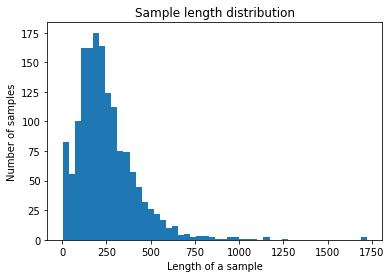

In [41]:
plot_sample_length_distribution(df['highlight'])

# Topic generator
Simple code sample from Bing AI to get an overview of the topics covered in the Kindle clippings.

In [42]:
# modified sample code from Bing AI to get some overview of the topics
# covered in the Kindle clipping dataset; once you have topics, you can
# conduct boolean searches as shown previously for more detail

# Import the necessary modules
# from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Extract the document-term matrix using CountVectorizer
vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                             max_features=1000,
                             stop_words='english')
X = vectorizer.fit_transform(df['highlight'])

# Fit the LDA model with n_components topics
lda = LatentDirichletAllocation(n_components=10, max_iter=10,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
lda.fit(X)

# Print the top 10 words for each topic
# feature_names = vectorizer.get_feature_names() bug requires _out() until updated
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print("Topic #%d:" % topic_idx)
    print(" ".join([feature_names[i]
                    for i in topic.argsort()[:-11:-1]]))
    print()

Topic #0:
trump state president election campaign court claims told degree fox

Topic #1:
learning model probability reward ai neural machine way use given

Topic #2:
time come way china 40 say ways share world power

Topic #3:
mr said tesla company twitter musk year investors million shares

Topic #4:
china debt inflation rates growth global economic high world economy

Topic #5:
like did words making paper knew young feeling better make

Topic #6:
year past billion end years percent half china 2022 market

Topic #7:
times ratio stocks dopamine low network brain used multiple result

Topic #8:
tech companies technology higher amazon problems ai new workers money

Topic #9:
president trump white decision train comes knowledge inside vice based



# Vocabulary generator

Another potentially useful feature is generating vocabulary automatically from the Kindle clippings. The code takes all single word clippings and adds them to the 'Kindle_vocab.csv' file.

In [43]:
vocabulary = df['highlight'].str.strip().str.split(' ').str.len().eq(1)
output = df[vocabulary]
vocab = output.loc[:,('highlight')].str.rstrip('.,;?')
df_csv = vocab.to_csv('Kindle_vocab.csv', index=True)
print('Printed to Kindle_vocab.csv')

Printed to Kindle_vocab.csv


In [44]:
print(vocab)

18               minatory
19           Trichinopoly
20             quadrangle
27                snooter
28                 harrow
30                    Huh
53               asphodel
56             dios—often
58              polymetis
70             sepulchral
134             oeillades
136                welkin
137                posset
138            breed-bate
139                 shent
170           gallimaufry
178                gibbet
181              frampold
182              wittolly
198           Aesculapius
204                   How
301            epistolary
303               Actaeon
304             whitsters
305           eyas-musket
319                   the
322        systematically
323                   for
350               Elohist
352           Aethiopians
416            proscenium
418             davenport
451                freind
453             surprized
465            Escritoire
466                pottle
467           declensions
468     Anthropophaginian
469         

In [45]:
# loads updated vocabulary file first. If this is the first time because Kindle clips have not been added
# or the file is missing then load base vocabulary file from 2DoList.csv
# if that file is missing, load blank.csv

try:
    main_vocabulary = pd.read_csv("Kindle_vocab_updated.csv")
except Exception as e:
    print("Kindle_vocab_updated.csv file not found, loading base file.")
    try:
        main_vocabulary = pd.read_csv("2DoList.csv")     # csv vocabulary file created previously
    except Exception as e:
        main_vocabulary = pd.read_csv("blank.csv")       # empty csv file if no vocabulary files available
main_vocabulary.shape

(55, 2)

In [46]:
# make sure index is the same
vocab.index = np.arange(0, len(vocab) + 0)

# object to dataframe
vocab_add = pd.DataFrame(vocab)

# create same column name
vocab_add.columns = ['WORD'] 

In [47]:
# update with new words only
# https://stackoverflow.com/questions/52342627/appending-only-new-values-from-a-dataframe-to-another-dataframe-in-pandas

updated_vocabulary = vocab_add.merge(main_vocabulary, how='left', indicator=True)
# selecting rows that are flagged with left_only
updated_vocabulary = updated_vocabulary[updated_vocabulary._merge == 'left_only'].iloc[:,:-1]
# update main_vocabulary with only updated words
main_vocabulary = pd.concat([main_vocabulary, updated_vocabulary], ignore_index=True)

display(main_vocabulary.shape)     #  checked that it does not add duplicate rows or columns even when repeated

# save to csv
df_csv = main_vocabulary.to_csv('Kindle_vocab_updated.csv', index=False)                # index=False as otherwise adding extra index columns
print('Saved new Kindle clipping words to Kindle_vocab_updated.csv.')

(55, 2)

Saved new Kindle clipping words to Kindle_vocab_updated.csv.


In [48]:
test_vocabulary = pd.read_csv("Kindle_vocab_updated.csv")
test_vocabulary.shape
test_vocabulary

,WORD,NOTE
0,minatory,NaN
1,Trichinopoly,NaN
2,quadrangle,NaN
3,snooter,NaN
4,harrow,NaN
5,Huh,NaN
6,asphodel,NaN
7,dios—often,NaN
8,polymetis,NaN
9,sepulchral,NaN
